In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as mlt
import seaborn as sns
mlt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [3]:
matches=pd.read_csv(r'C:\Users\Parnal\Documents\Python for Data Science and ML Bootcamp\Kaggle\IPL\matches.csv')   
delivery=pd.read_csv(r'C:\Users\Parnal\Documents\Python for Data Science and ML Bootcamp\Kaggle\IPL\deliveries.csv')
matches.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
matches.drop(['umpire3'],axis=1,inplace=True)  #since all the values are NaN
delivery.fillna(0,inplace=True)

In [5]:
matches['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

In [6]:
matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

delivery.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

In [7]:
print('Total Matches Played:',matches.shape[0])
print(' \n Venues Played At:',matches['city'].unique())     
print(' \n Teams :',matches['team1'].unique())

Total Matches Played: 636
 
 Venues Played At: ['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan]
 
 Teams : ['SRH' 'MI' 'GL' 'RPS' 'RCB' 'KKR' 'DD' 'KXIP' 'CSK' 'RR' 'DC' 'KTK' 'PW']


In [8]:
print('Total venues played at:',matches['city'].nunique())
print('\nTotal umpires ',matches['umpire1'].nunique())

Total venues played at: 30

Total umpires  44


In [9]:
print((matches['player_of_match'].value_counts()).idxmax(),' : has most man of the match awards')
print(((matches['winner']).value_counts()).idxmax(),': has the highest number of match wins')

CH Gayle  : has most man of the match awards
MI : has the highest number of match wins


In [10]:
df=matches.iloc[[matches['win_by_runs'].idxmax()]]
df[['season','team1','team2','winner','win_by_runs']]

,season,team1,team2,winner,win_by_runs
43,2017,MI,DD,MI,146


In [11]:
df=matches.iloc[[matches['win_by_wickets'].idxmax()]]
df[['season','team1','team2','winner','win_by_wickets']]

,season,team1,team2,winner,win_by_wickets
2,2017,GL,KKR,KKR,10


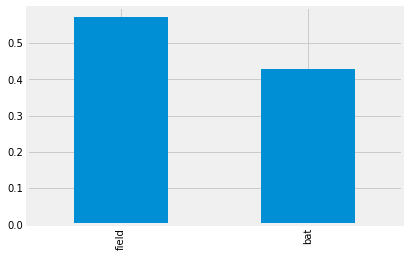

In [12]:
(matches['toss_decision'].value_counts()/636).plot.bar()

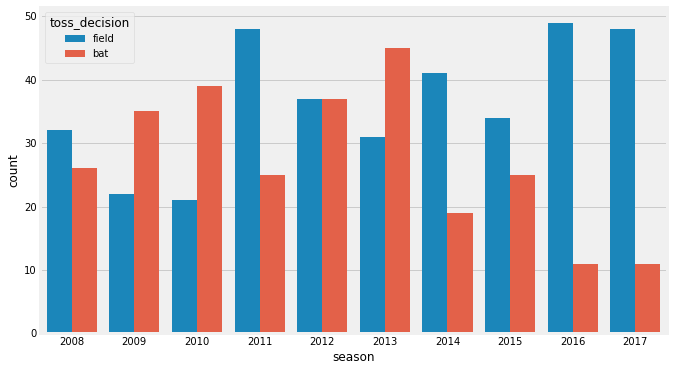

In [13]:
mlt.subplots(figsize=(10,6))
sns.countplot(x='season',hue='toss_decision',data=matches)
mlt.show()

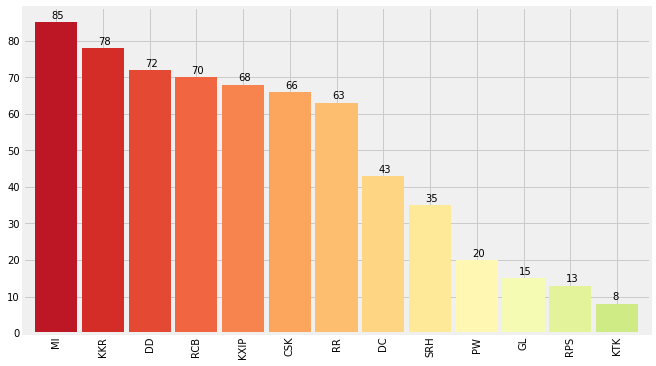

In [18]:
mlt.subplots(figsize=(10,6))
ax=matches['toss_winner'].value_counts().plot.bar(width=0.9,color=sns.color_palette('RdYlGn',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.35, p.get_height()+1))
mlt.show()

In [19]:
matches_played_byteams=pd.concat([matches['team1'],matches['team2']])
matches_played_byteams=matches_played_byteams.value_counts().reset_index()
matches_played_byteams.columns=['Team','Total Matches']
matches_played_byteams['wins']=matches['winner'].value_counts().reset_index()['winner']
matches_played_byteams.set_index('Team',inplace=True)
matches_played_byteams

,Total Matches,wins
Team,,
MI,157,92
RCB,152,79
KXIP,148,77
KKR,148,73
DD,147,70
CSK,131,63
RR,118,62
SRH,76,42
DC,75,29


In [20]:
trace1 = go.Bar(
    x=matches_played_byteams.index,
    y=matches_played_byteams['Total Matches'],
    name='Total Matches'
)
trace2 = go.Bar(
    x=matches_played_byteams.index,
    y=matches_played_byteams['wins'],
    name='Matches Won'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

In [29]:
matches_played_byteams['Win %']=matches_played_byteams['wins']/matches_played_byteams['Total Matches']
matches_played_byteams

,Total Matches,wins,Win %
Team,,,
MI,157,92,0.585987
RCB,152,79,0.519737
KXIP,148,77,0.520270
KKR,148,73,0.493243
DD,147,70,0.476190
CSK,131,63,0.480916
RR,118,62,0.525424
SRH,76,42,0.552632
DC,75,29,0.386667


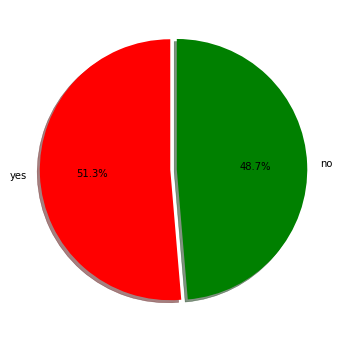

In [48]:
df=matches[matches['toss_winner']==matches['winner']]
slices=[len(df),(633-len(df))]
labels=['yes','no']
mlt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0.05),autopct='%1.1f%%',colors=['r','g'])
fig = mlt.gcf()
fig.set_size_inches(6,6)
mlt.show()

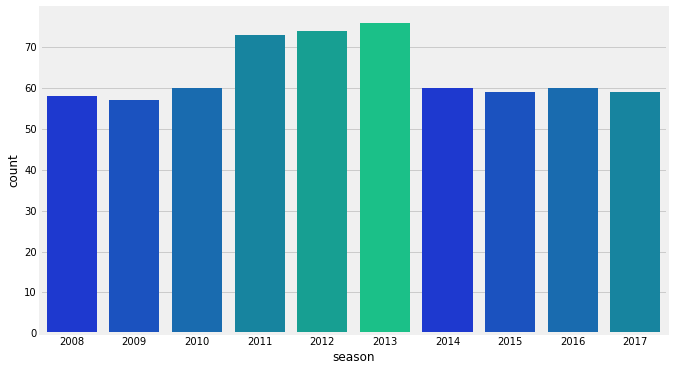

In [49]:
mlt.subplots(figsize=(10,6))
sns.countplot(x='season',data=matches,palette=sns.color_palette('winter'))  #countplot automatically counts the frequency of an item
mlt.show()

In [50]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,RPS,KXIP,KXIP,field,normal,0,KXIP,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,RCB,DD,RCB,bat,normal,0,RCB,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [51]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,0,0,0
3,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,0,0,0


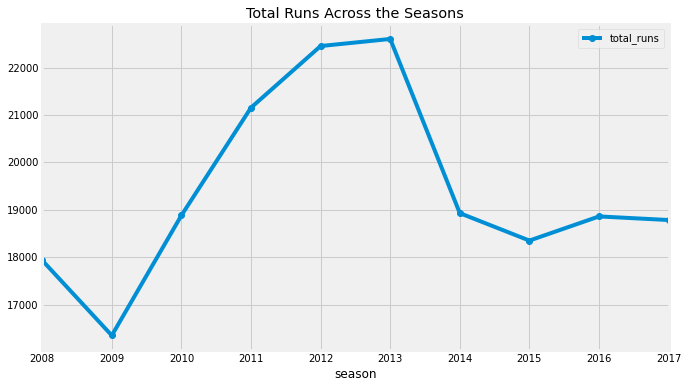

In [57]:
batsmen = matches[['id','season']].merge(delivery, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
season=batsmen.groupby('season')['total_runs'].sum().reset_index()
season.set_index('season').plot(marker='o')
mlt.gcf().set_size_inches(10,6)
mlt.title('Total Runs Across the Seasons')
mlt.show()

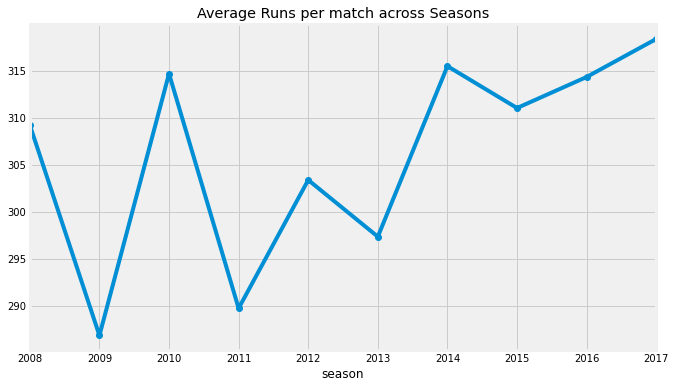

In [68]:
avgruns_each_season=matches.groupby(['season']).count().id.reset_index()
avgruns_each_season.rename(columns={'id':'matches'},inplace=1)
avgruns_each_season['total_runs']=season['total_runs']
avgruns_each_season['average_runs_per_match']=avgruns_each_season['total_runs']/avgruns_each_season['matches']
avgruns_each_season.set_index('season')['average_runs_per_match'].plot(marker='o')
mlt.gcf().set_size_inches(10,6)
mlt.title('Average Runs per match across Seasons')
mlt.show()

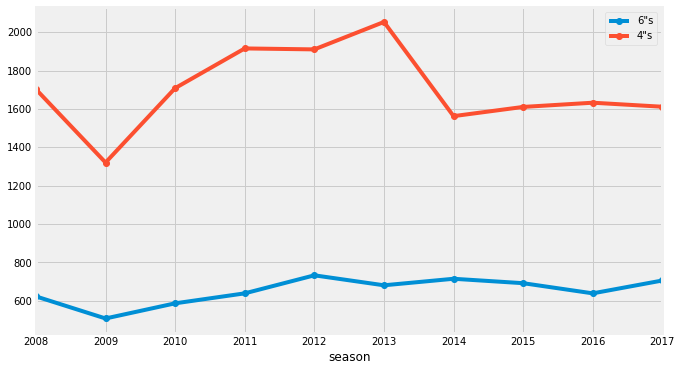

In [74]:
Season_boundaries=batsmen.groupby("season")["batsman_runs"].agg(lambda x: (x==6).sum()).reset_index()
a=batsmen.groupby("season")["batsman_runs"].agg(lambda x: (x==4).sum()).reset_index()
Season_boundaries=Season_boundaries.merge(a,left_on='season',right_on='season',how='left')
Season_boundaries=Season_boundaries.rename(columns={'batsman_runs_x':'6"s','batsman_runs_y':'4"s'})
Season_boundaries.set_index('season')[['6"s','4"s']].plot(marker='o')
fig=mlt.gcf()
fig.set_size_inches(10,6)
mlt.show()

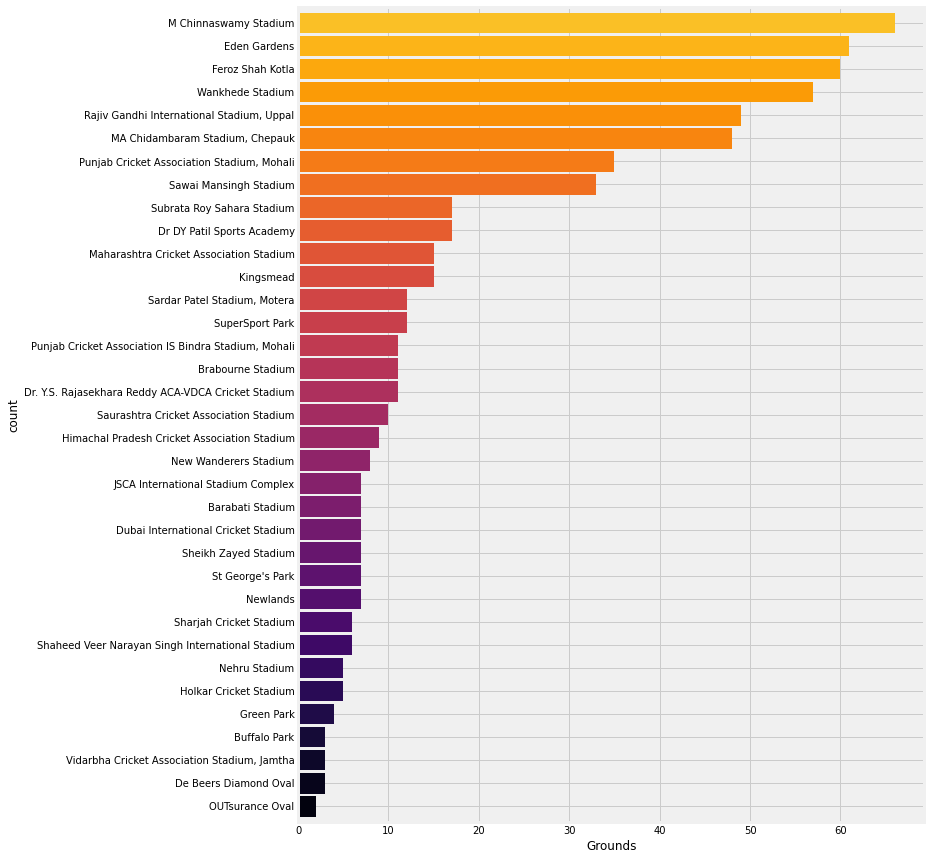

In [79]:
mlt.subplots(figsize=(10,15))
ax = matches['venue'].value_counts().sort_values(ascending=True).plot.barh(width=.9,color=sns.color_palette('inferno',40))
ax.set_xlabel('Grounds')
ax.set_ylabel('count')
mlt.show()

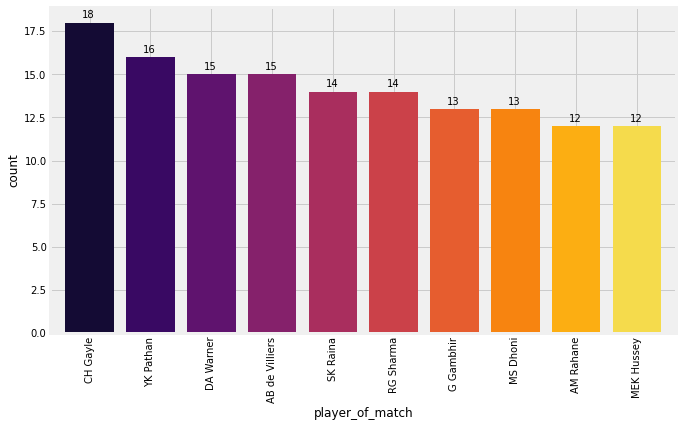

In [83]:
mlt.subplots(figsize=(10,6))
#the code used is very basic but gets the job done easily
ax = matches['player_of_match'].value_counts().head(10).plot.bar(width=.8, color=sns.color_palette('inferno',10))  #counts the values corresponding 
# to each batsman and then filters out the top 10 batsman and then plots a bargraph 
ax.set_xlabel('player_of_match') 
ax.set_ylabel('count')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.28, p.get_height()+0.25))
mlt.show()

In [93]:
print('Winners By Years')
for i in range(2008,2017):
    df=((matches[matches['season']==i]).iloc[-1]) 
    print(df[[1,10]].values)

Winners By Years
[2008 'RR']
[2009 'DC']
[2010 'CSK']
[2011 'CSK']
[2012 'KKR']
[2013 'MI']
[2014 'KKR']
[2015 'MI']
[2016 'SRH']


In [98]:
print('\n Total Matches with Super Overs:',delivery[delivery['is_super_over']==1].match_id.nunique())


 Total Matches with Super Overs: 7


In [102]:
teams=['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW']
play=delivery[delivery['is_super_over']==1].batting_team.unique()
play=list(play)
print('Teams who haven"t ever played a super over are:' ,list(set(teams)-set(play)))

Teams who haven"t ever played a super over are: ['DC', 'RPS', 'PW', 'KTK']


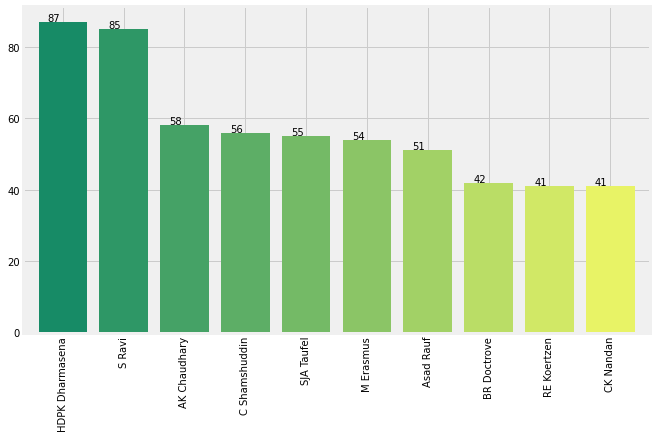

In [101]:
mlt.subplots(figsize=(10,6))
ump=pd.concat([matches['umpire1'],matches['umpire2']]) 
ax=ump.value_counts().head(10).plot.bar(width=0.8,color=sns.color_palette('summer',10))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.25))
mlt.show()

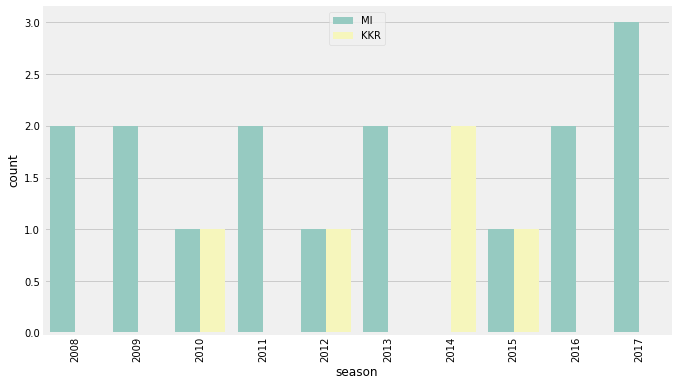

In [125]:
def team1_vs_team2(team1,team2):
    mt1=matches[((matches['team1']==team1)|(matches['team2']==team1))&((matches['team1']==team2)|(matches['team2']==team2))]
    sns.countplot(x='season', hue='winner',data=mt1,palette='Set3')
    mlt.xticks(rotation='vertical')
    leg = mlt.legend( loc = 'upper center')
    fig=mlt.gcf()
    fig.set_size_inches(10,6)
    mlt.show()
team1_vs_team2('MI','KKR')

In [115]:
def comparator(team1):
    teams=['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW']
    teams.remove(team1)
    opponents=teams.copy()
    mt1=matches[((matches['team1']==team1)|(matches['team2']==team1))]
    for i in opponents:
        mask = (((mt1['team1']==i)|(mt1['team2']==i)))&((mt1['team1']==team1)|(mt1['team2']==team1))
        mt2 = mt1.loc[mask, 'winner'].value_counts().to_frame().T
        print(mt2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
66,67,2008,Chennai,2008-04-23,CSK,MI,MI,field,normal,0,CSK,6,0,ML Hayden,"MA Chidambaram Stadium, Chepauk",DJ Harper,GA Pratapkumar
95,96,2008,Mumbai,2008-05-14,CSK,MI,MI,field,normal,0,MI,0,9,ST Jayasuriya,Wankhede Stadium,BR Doctrove,AM Saheba
117,118,2009,Cape Town,2009-04-18,MI,CSK,CSK,field,normal,0,MI,19,0,SR Tendulkar,Newlands,BR Doctrove,K Hariharan
161,162,2009,Port Elizabeth,2009-05-16,MI,CSK,MI,bat,normal,0,CSK,0,7,ML Hayden,St George's Park,SK Tarapore,SJA Taufel
193,194,2010,Mumbai,2010-03-25,CSK,MI,MI,field,normal,0,MI,0,5,SR Tendulkar,Brabourne Stadium,BF Bowden,AM Saheba
210,211,2010,Chennai,2010-04-06,CSK,MI,CSK,bat,normal,0,CSK,24,0,SK Raina,"MA Chidambaram Stadium, Chepauk",S Asnani,DJ Harper
233,234,2010,Mumbai,2010-04-25,CSK,MI,CSK,bat,normal,0,CSK,22,0,SK Raina,Dr DY Patil Sports Academy,RE Koertzen,SJA Taufel
256,257,2011,Mumbai,2011-04-22,MI,CSK,CSK,field,normal,0,MI,8,0,Harbhajan Singh,Wankhede Stadium,Asad Rauf,AM Saheba
307,308,2012,Chennai,2012-04-04,CSK,MI,MI,field,normal,0,MI,0,8,RE Levi,"MA Chidambaram Stadium, Chepauk",JD Cloete,SJA Taufel
354,355,2012,Mumbai,2012-05-06,CSK,MI,MI,field,normal,0,MI,0,2,DR Smith,Wankhede Stadium,Asad Rauf,S Asnani


In [114]:
matches['team1']

0      SRH
1       MI
2       GL
3      RPS
4      RCB
      ... 
631     DD
632     GL
633    SRH
634     GL
635    SRH
Name: team1, Length: 636, dtype: object